In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Import necessary libraries needed

In [2]:
data = pd.read_csv(r"C:\Users\Lenovo\Desktop\DS\Project\Telecom_customer_churn.csv.txt")
data

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

Open and read the data
## Data Explanation
- There are various features given to consider the customers being in a telecom service
- We have to examine customer data
- Customer retention is the main concept of this dataset


# Exploratory Data Analysis
## Identifying variables and data types

In [3]:
data.shape

(7043, 21)

There is good amount of data with 20 features
## Checking data types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- There is no null values present
- There are 18 features which are of object type data

In [5]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- There are 20 features and churn is the target variable in the dataset
- cutomer_id is not necessary for the prediction.So, remove it

In [6]:
data = data.drop(['customerID'],axis = 1)

Dropped customerID feature which is not necessary for the analysis

## Check the unique values of object type data

In [7]:
print(data['gender'].nunique())
print(data['Partner'].nunique())
print(data['Dependents'].nunique())
print(data['PhoneService'].nunique())
print(data['MultipleLines'].nunique())
print(data['InternetService'].nunique())
print(data['OnlineSecurity'].nunique())
print(data['OnlineBackup'].nunique())
print(data['DeviceProtection'].nunique())
print(data['TechSupport'].nunique())
print(data['StreamingTV'].nunique())
print(data['StreamingMovies'].nunique())
print(data['PaperlessBilling'].nunique())
print(data['PaymentMethod'].nunique())
print(data['TotalCharges'].nunique())
print(data['Churn'].nunique())

2
2
2
2
3
3
3
3
3
3
3
3
2
4
6531
2


In [8]:
pd.set_option('display.max_rows', None)
ps = pd.DataFrame(data['TotalCharges'].unique())
ps

0
0       29.85
1      1889.5
2      108.15
3     1840.75
4      151.65
5       820.5
6      1949.4
7       301.9
8     3046.05
9     3487.95
10     587.45
11      326.8
12     5681.1
13     5036.3
14    2686.05
15    7895.15
16    1022.95
17    7382.25
18     528.35
19     1862.9
20      39.65
21     202.25
22      20.15
23     3505.1
24     2970.3
25     1530.6
26    4749.15
27       30.2
28    6369.45
29     1093.1
30    6766.95
31     181.65
32    1874.45
33       20.2
34      45.25
35     7251.7
36      316.9
37     3548.3
38    3549.25
39     1105.4
40      475.7
41    4872.35
42     418.25
43    4861.45
44     981.45
45     3906.7
46         97
47     144.15
48     4217.8
49     4254.1
50    3838.75
51     1426.4
52    1752.65
53      633.3
54    4456.35
55    1752.55
56     6311.2
57    7076.35
58      894.3
59     7853.7
60     4707.1
61     5450.7
62       2962
63      957.1
64     857.25
65      244.1
66    3650.35
67     2497.2
68      930.9
69     887.35
70      49.05
71    1090.65
72       7099
73     1424.6
74      177.4
75     6139.5
76    2688.85
77     482.25
78     2111.3
79     1216.6
80      79.35
81     565.35
82      496.9
83     4327.5
84     973.35
85     918.75
86    2215.45
87       1057
88      927.1
89    1009.25
90     2570.2
91       74.7
92    5714.25
93       7107
94    7459.05
95     927.35
96     4748.7
97     113.85
98     1107.2
99     2514.5
100     19.45
101    3605.6
102   3027.25
103   7611.85
104     100.2
105   7303.05
106    927.65
107    3921.3
108   1363.25
109    5238.9
110   3042.25
111    3954.1
112   2868.15
113    3423.5
114     248.4
115   1126.35
116   1064.65
117    835.15
118    2151.6
119   5515.45
120    112.75
121    229.55
122    350.35
123      62.9
124   3027.65
125    2135.5
126   1723.95
127     19.75
128   3985.35
129   1215.65
130   1502.65
131    3260.1
132     35.45
133     81.25
134    1188.2
135    1778.5
136   1277.75
137   1170.55
138     70.45
139   6425.65
140    563.65
141   5971.25
142   5289.05
143    1756.2
144    6416.7
145     61.35
146     45.65
147   1929.95
148    1071.4
149    564.35
150     655.5
151   7930.55
152   5215.25
153     113.5
154    1152.8
155   1821.95
156     419.9
157      1024
158     251.6
159    764.55
160   1592.35
161     135.2
162   3958.25
163     233.9
164   1363.45
165       273
166   6254.45
167    2651.2
168     321.4
169   3539.25
170     242.8
171   1181.75
172    5000.2
173    654.55
174     780.2
175    1145.7
176     503.6
177   1559.25
178      1252
179     29.95
180      45.3
181    662.65
182    2453.3
183   1111.65
184      24.8
185   1023.85
186     82.15
187     244.8
188    2379.1
189   3173.35
190       531
191    1375.4
192    8129.3
193    1192.7
194   1901.65
195     587.4
196   6519.75
197   8041.65
198     20.75
199   2681.15
200    1112.3
201    7405.5
202   1033.95
203   2958.95
204   2684.85
205    4179.2
206      79.9
207   1934.45
208    6654.1
209      84.5
210     25.25
211    1124.2
212    540.05
213   1975.85
214   3437.45
215    3139.8
216    3789.2
217    5324.5
218     624.6
219    268.35
220    1836.9
221    179.35
222    219.35
223   1288.75
224   2545.75
225      55.2
226   2723.15
227   4107.25
228   5760.65
229    4747.5
230      84.6
231    1566.9
232       702
233     114.1
234    299.05
235   1305.95
236    1120.3
237    284.35
238    6350.5
239    7878.3
240   3187.65
241   6126.15
242     731.3
243     273.4
244    2531.8
245    1074.3
246     48.55
247   4298.45
248   4619.55
249    147.15
250      40.2
251    2633.3
252    193.05
253    4103.9
254   7008.15
255    5791.1
256     80.55
257   1228.65
258     132.2
259    1364.3
260   4925.35
261    1520.1
262   5032.25
263   5526.75
264   1195.25
265   2007.25
266    1099.6
267   1732.95
268    1511.2
269   3450.15
270   2172.05
271      70.6
272     401.1
273   5624.85
274    1339.8
275    771.95
276    244.75
277     322.9
278    498.25
279      25.4
280   3687.75
281   1779.95
282    1783.6
283    927.15
284        70
285    6

- Though there is no NaN values in Total Chrages, it is a float type of column
- Total charges is displaying object type of data
- FInd any blank spaces left in the column

## Treating NaN values

In [9]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There is no NaN values present

In [10]:
data.loc[data['TotalCharges']== ' ']

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

There are blank spaces in the Total charges column. Convert that as NaN and fill it with mean

In [11]:
data['TotalCharges'] = data['TotalCharges'].replace(" ",np.nan)
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [12]:
data['TotalCharges'] = data['TotalCharges'].fillna(np.mean(data['TotalCharges']))

Thus the NaN values filled with mean

## Visualisation of categorical variable

In [13]:
class_data = data[[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']]

<function matplotlib.pyplot.show(close=None, block=None)>

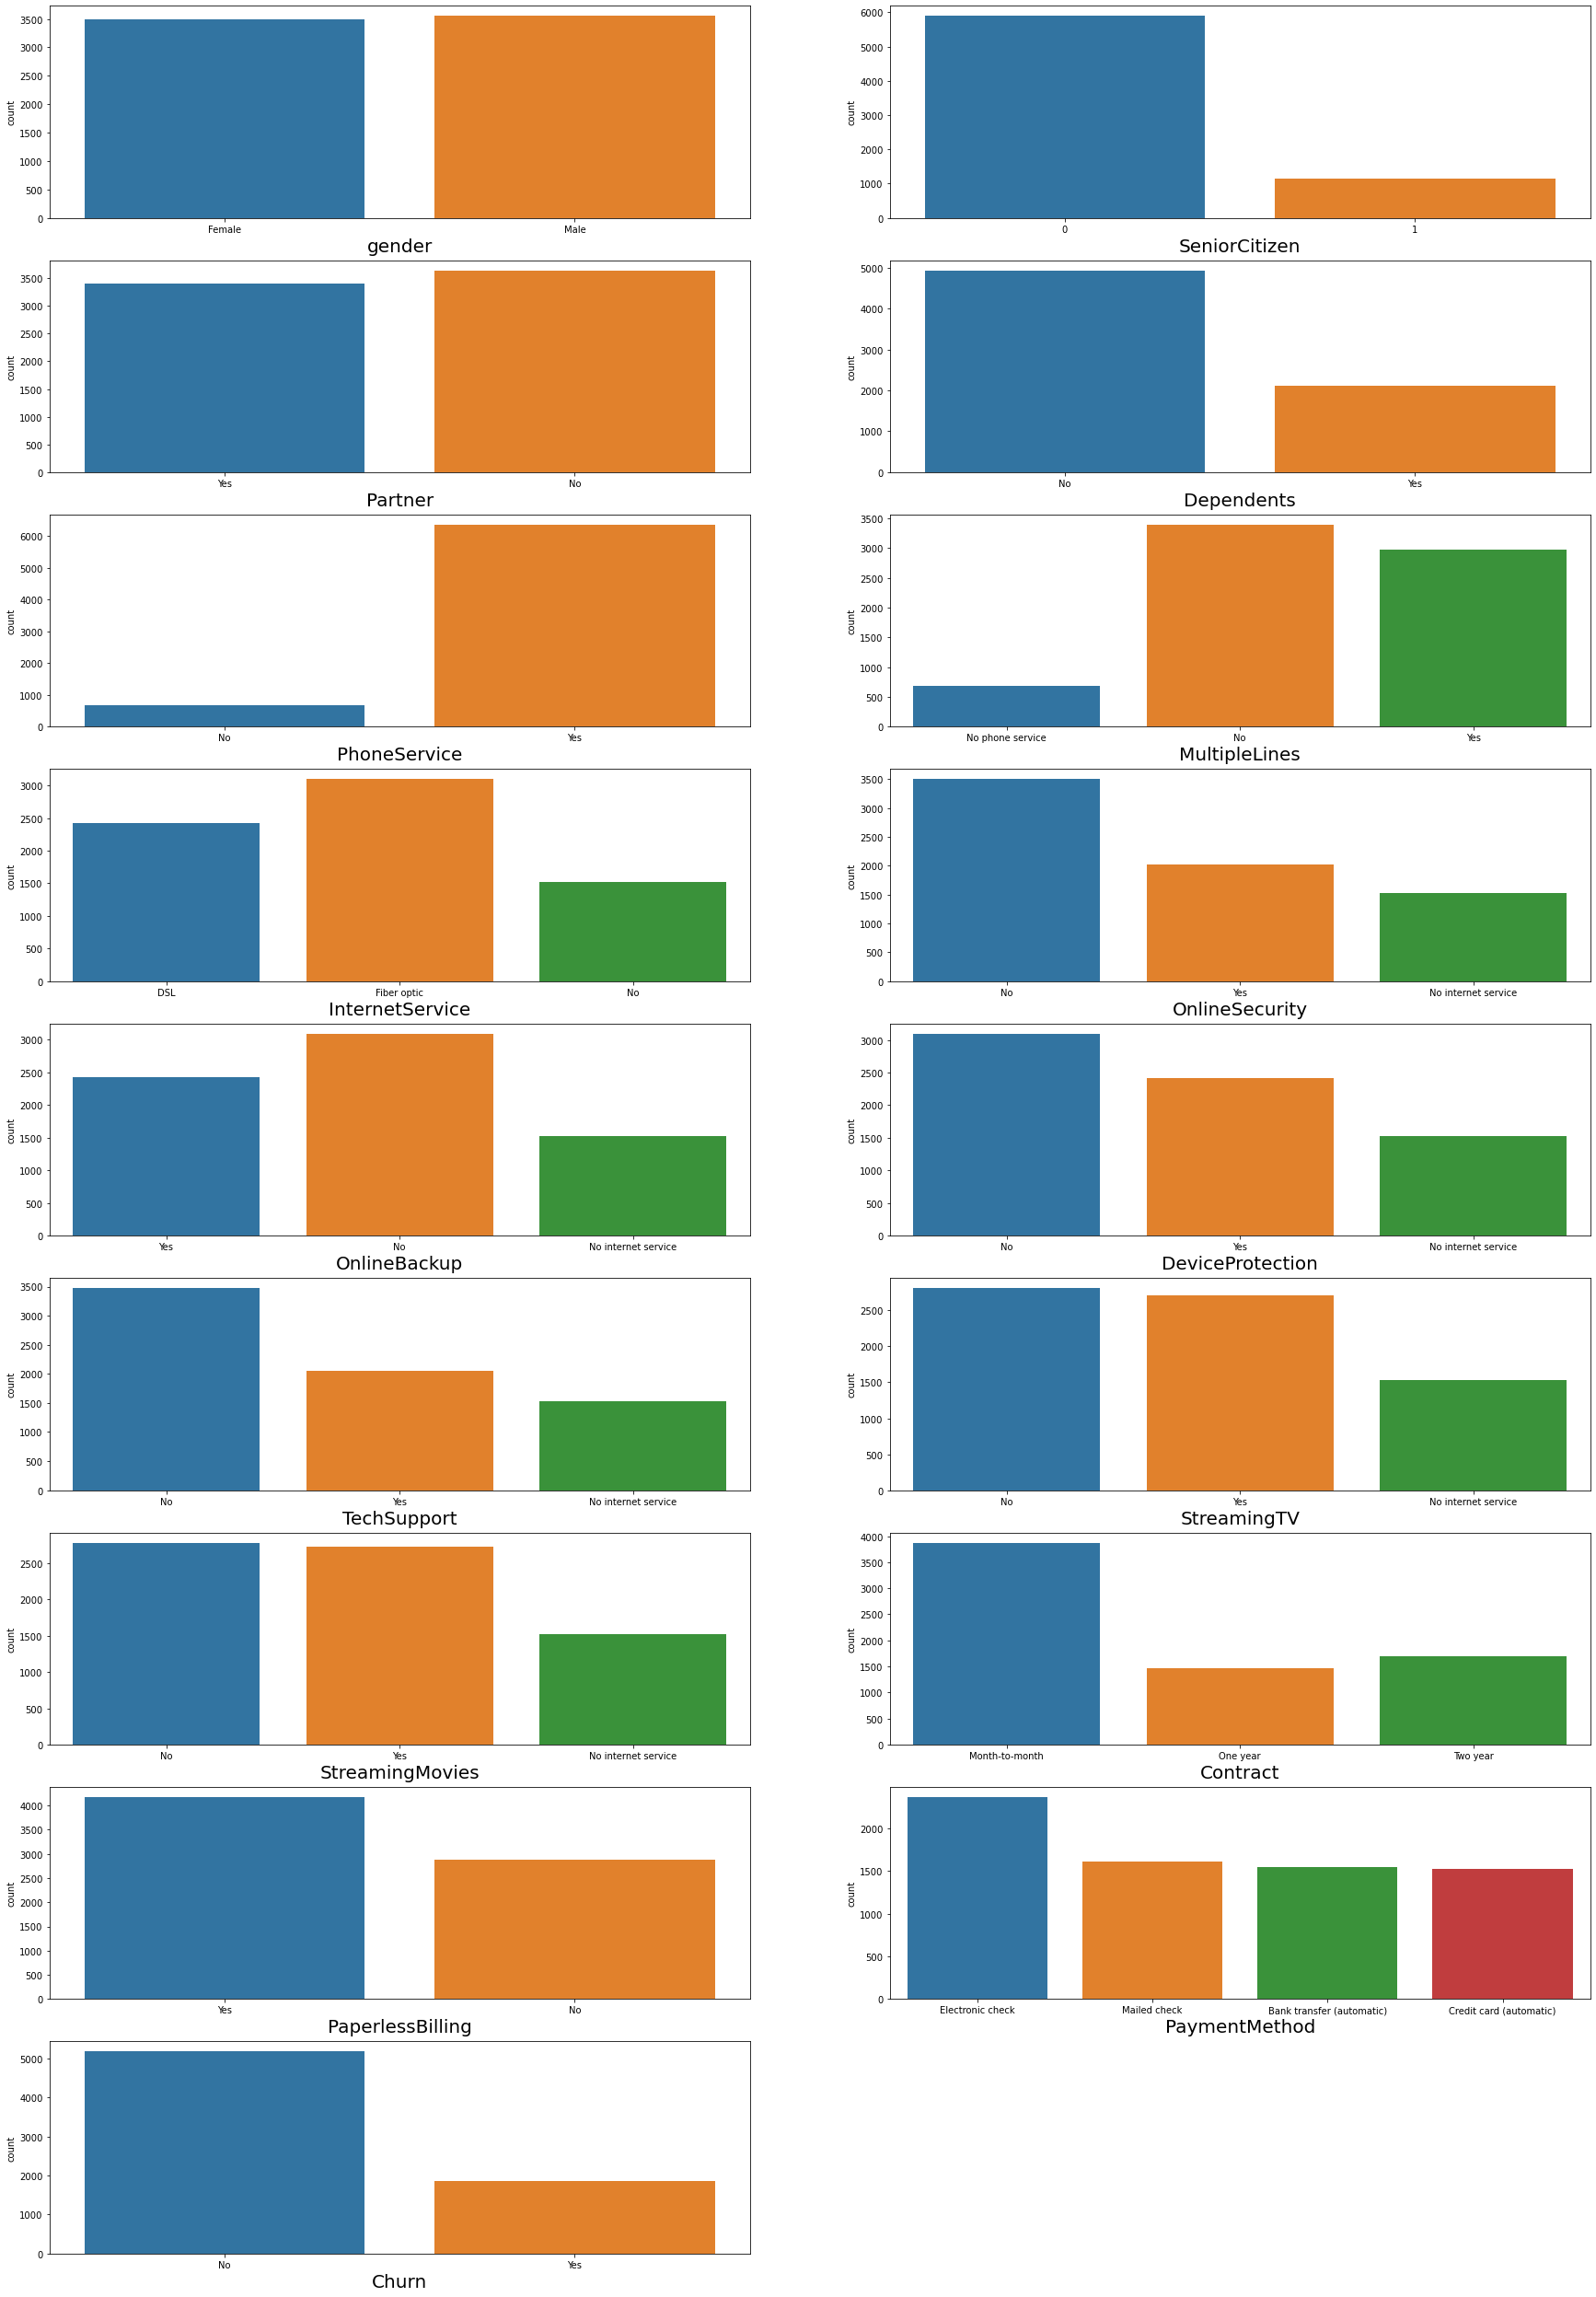

In [14]:
plt.figure(figsize = (30,50), facecolor = 'white')
plotnumber = 1

for column in class_data:
    if plotnumber <=20:
        ax =  plt.subplot(10,2,plotnumber)
        sns.countplot(x = column, data = class_data)
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

- Both male and female gender looks balanced
- Youth population is more than the senior citizens
- Partners or not partners seem to be equal and balanced
- Not a dependent is more
- Having phone service is more
- Not having multiple lines are more compared to to having multiple lines and not having a phone service
- Fibre optic cable is more
- Not having online security is more
- Not having online backup is more
- Not having devicee protection is more in number
- Having tech support and no internet service looks balanced and minimum compared to not having tech support
- Streaming TV looks little balanced
- Not having internet service is less and streaming movies yes and no looks balanced
- Month to month is more
- Paperless billing is more
- Electronic checck payment method is more and otehrs are balanced
- Churn looks imbalanced which has to balanced

## Visualisation of Continuous variable

In [15]:
continuous_data = data.drop([ 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'],axis = 1)

<function matplotlib.pyplot.show(close=None, block=None)>

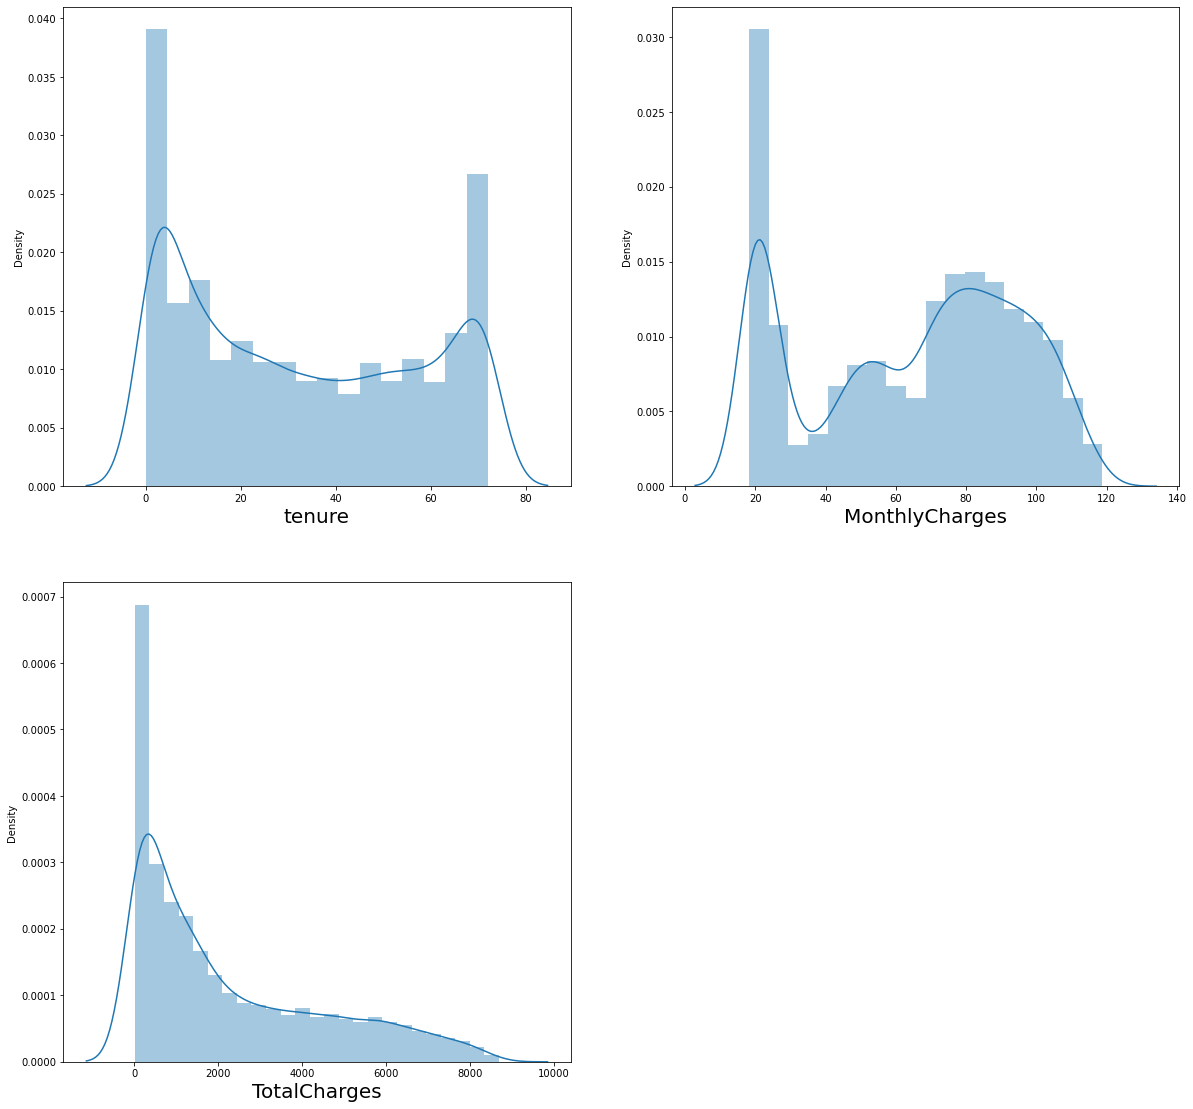

In [16]:
plt.figure(figsize = (20,30), facecolor = 'white')
plotnumber = 1

for column in continuous_data:
    if plotnumber <=6:
        ax =  plt.subplot(3,2,plotnumber)
        sns.distplot(continuous_data[column])
        plt.xlabel(column, fontsize = 20)
    plotnumber+=1
plt.show

Tenure, Monthly charges and total charges looks standardised and has a normalised curve

## Encoding

In [17]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [18]:
for i in data.columns:
    if data[i].dtypes =='object':
        data[i] = enc.fit_transform(data[i].values.reshape(-1,1))
data

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0        0.0              0      1.0         0.0       1           0.0   
1        1.0              0      0.0         0.0      34           1.0   
2        1.0              0      0.0         0.0       2           1.0   
3        1.0              0      0.0         0.0      45           0.0   
4        0.0              0      0.0         0.0       2           1.0   
5        0.0              0      0.0         0.0       8           1.0   
6        1.0              0      0.0         1.0      22           1.0   
7        0.0              0      0.0         0.0      10           0.0   
8        0.0              0      1.0         0.0      28           1.0   
9        1.0              0      0.0         1.0      62           1.0   
10       1.0              0      1.0         1.0      13           1.0   
11       1.0              0      0.0         0.0      16           1.0   
12       1.0              0      1.0         0.0      58           1.0   
13       1.0              0      0.0         0.0      49           1.0   
14       1.0              0      0.0         0.0      25           1.0   
15       0.0              0      1.0         1.0      69           1.0   
16       0.0              0      0.0         0.0      52           1.0   
17       1.0              0      0.0         1.0      71           1.0   
18       0.0              0      1.0         1.0      10           1.0   
19       0.0              0      0.0         0.0      21           1.0   
20       1.0              1      0.0         0.0       1           0.0   
21       1.0              0      1.0         0.0      12           1.0   
22       1.0              0      0.0         0.0       1           1.0   
23       0.0              0      1.0         0.0      58           1.0   
24       1.0              0      1.0         1.0      49           1.0   
25       0.0              0      0.0         0.0      30           1.0   
26       1.0              0      1.0         1.0      47           1.0   
27       1.0              0      1.0         1.0       1           0.0   
28       1.0              0      1.0         0.0      72           1.0   
29       0.0              0      0.0         1.0      17           1.0   
30       0.0              1      1.0         0.0      71           1.0   
31       1.0              1      1.0         0.0       2           1.0   
32       0.0              0      1.0         1.0      27           1.0   
33       1.0              0      0.0         0.0       1           1.0   
34       1.0              1      0.0         0.0       1           1.0   
35       0.0              0      1.0         1.0      72           1.0   
36       1.0              0      0.0         0.0       5           1.0   
37       0.0              0      0.0         0.0      46           1.0   
38       1.0              0      0.0         0.0      34           1.0   
39       0.0              0      0.0         0.0      11           1.0   
40       1.0              0      1.0         1.0      10           1.0   
41       0.0              0      1.0         1.0      70           1.0   
42       0.0              0      1.0         1.0      17           1.0   
43       0.0              0      0.0         0.0      63           1.0   
44       0.0              0      1.0         0.0      13           1.0   
45       0.0              0      0.0         0.0      49           1.0   
46       1.0              0      0.0         0.0       2           1.0   
47       0.0              0      0.0         0.0       2           1.0   
48       1.0              0      0.0         0.0      52           1.0   
49       0.0              0      1.0         1.0      69           1.0   
50       0.0              1      0.0         0.0      43           1.0   
51       0.0              0      0.0         0.0      15           1.0   
52       0.0              1      1.0         0.0      25           1.0   
53       0

Thus the data is encoded using ordinal encoder

## Describing the data after encoding

In [19]:
data.describe()

gender  SeniorCitizen      Partner   Dependents       tenure  \
count  7043.000000    7043.000000  7043.000000  7043.000000  7043.000000   
mean      0.504756       0.162147     0.483033     0.299588    32.371149   
std       0.500013       0.368612     0.499748     0.458110    24.559481   
min       0.000000       0.000000     0.000000     0.000000     0.000000   
25%       0.000000       0.000000     0.000000     0.000000     9.000000   
50%       1.000000       0.000000     0.000000     0.000000    29.000000   
75%       1.000000       0.000000     1.000000     1.000000    55.000000   
max       1.000000       1.000000     1.000000     1.000000    72.000000   

       PhoneService  MultipleLines  InternetService  OnlineSecurity  \
count   7043.000000    7043.000000      7043.000000     7043.000000   
mean       0.903166       0.940508         0.872923        0.790004   
std        0.295752       0.948554         0.737796        0.859848   
min        0.000000       0.000000         0.000000        0.000000   
25%        1.000000       0.000000         0.000000        0.000000   
50%        1.000000       1.000000         1.000000        1.000000   
75%        1.000000       2.000000         1.000000        2.000000   
max        1.000000       2.000000         2.000000        2.000000   

       OnlineBackup  DeviceProtection  TechSupport  StreamingTV  \
count   7043.000000       7043.000000  7043.000000  7043.000000   
mean       0.906432          0.904444     0.797104     0.985376   
std        0.880162          0.879949     0.861551     0.885002   
min        0.000000          0.000000     0.000000     0.000000   
25%        0.000000          0.000000     0.000000     0.000000   
50%        1.000000          1.000000     1.000000     1.000000   
75%        2.000000          2.000000     2.000000     2.000000   
max        2.000000          2.000000     2.000000     2.000000   

       StreamingMovies     Contract  PaperlessBilling  PaymentMethod  \
count      7043.000000  7043.000000       7043.000000    7043.000000   
mean          0.992475     0.690473          0.592219       1.574329   
std           0.885091     0.833755          0.491457       1.068104   
min           0.000000     0.000000          0.000000       0.000000   
25%           0.000000     0.000000          0.000000       1.000000   
50%           1.000000     0.000000          1.000000       2.000000   
75%           2.000000     1.000000          1.000000       2.000000   
max           2.000000     2.000000          1.000000       3.000000   

       MonthlyCharges  TotalCharges        Churn  
count     7043.000000   7043.000000  7043.000000  
mean        64.761692   2283.300441     0.265370  
std         30.090047   2265.000258     0.441561  
min         18.250000     18.800000     0.000000  
25%         35.500000    402.225000     0.000000  
50%         70.350000   1400.550000     0.000000  
75%         89.850000   3786.600000     1.000000  
max        118.750000   8684.800000     1.000000

The data has to be standardised since there is varied range of numbers

## Correlation

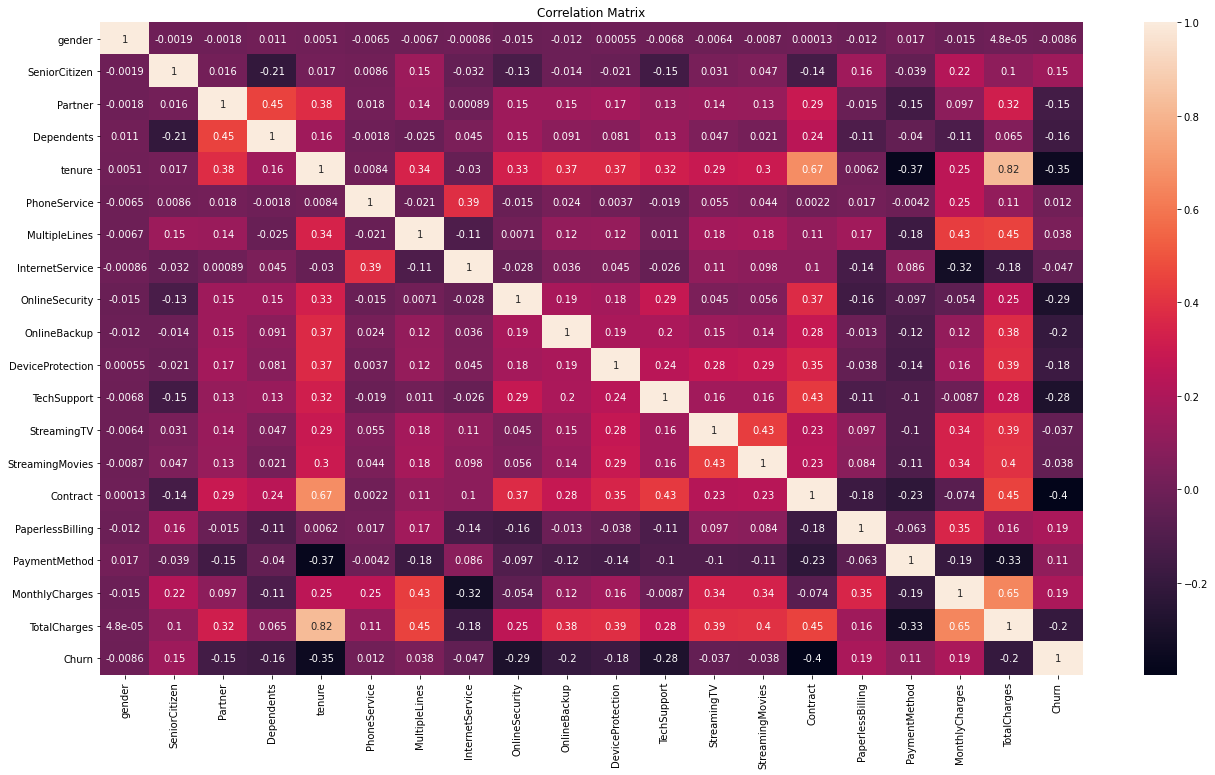

In [20]:
corr_mat = data.corr()
plt.figure(figsize=[22,12])
sns.heatmap(corr_mat,annot = True)
plt.title('Correlation Matrix')
plt.show()

There is no strong correlation found between the variables
## Collinearity

<function matplotlib.pyplot.show(close=None, block=None)>

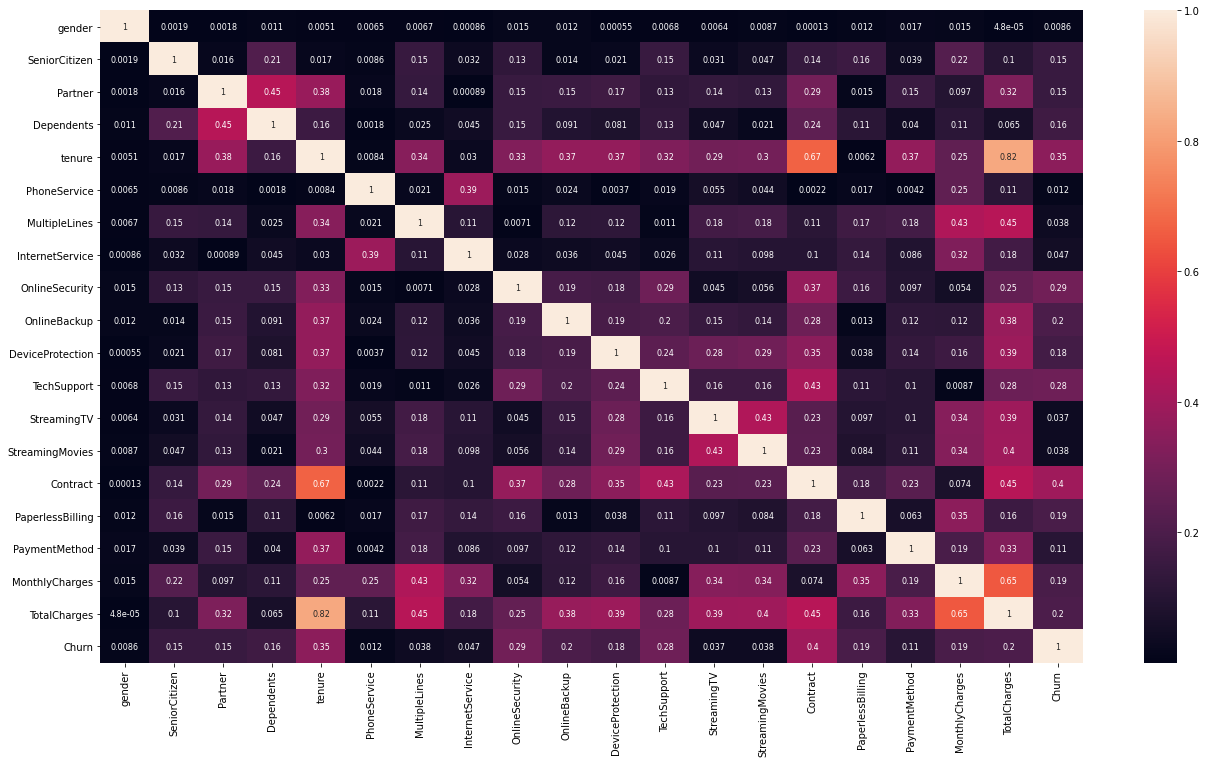

In [21]:
data_corr = data.corr().abs()
plt.figure (figsize = (22,12))
sns.heatmap(data_corr,annot = True, annot_kws = {'size':8}) 
plt.show

There is no high collinearity found between the variables
## Treat Skewness

In [22]:
x = data.drop('Churn',axis=1)
y = data['Churn']

In [23]:
x.skew()
x.skew().sort_values()

PhoneService       -2.727153
PaperlessBilling   -0.375396
MonthlyCharges     -0.220524
PaymentMethod      -0.170129
gender             -0.019031
StreamingMovies     0.014657
StreamingTV         0.028486
Partner             0.067922
MultipleLines       0.118719
OnlineBackup        0.182930
DeviceProtection    0.186847
InternetService     0.205423
tenure              0.239540
TechSupport         0.402365
OnlineSecurity      0.416985
Contract            0.630959
Dependents          0.875199
TotalCharges        0.962394
SeniorCitizen       1.833633
dtype: float64

Since the categorical variables are only having skewness, these need not be treated
## Outliers check

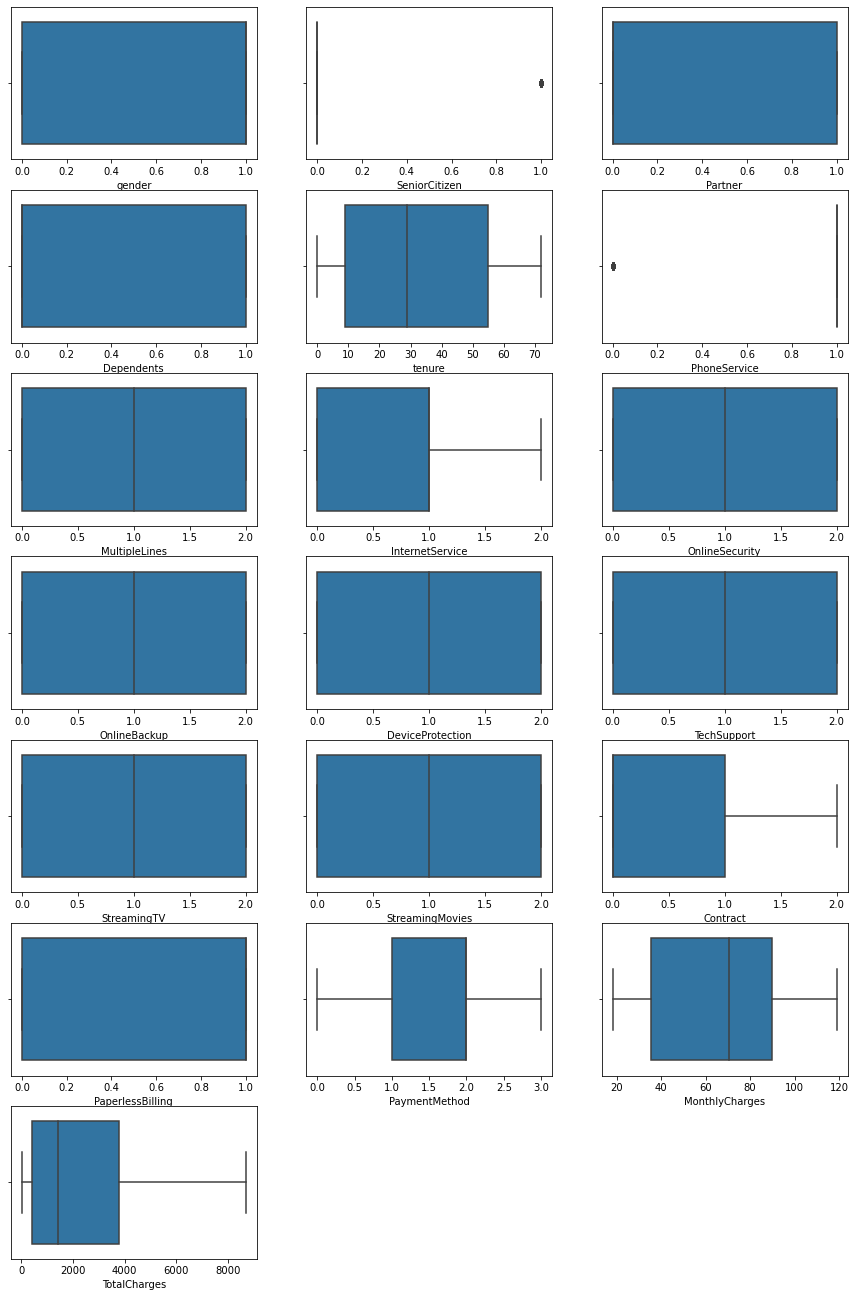

In [24]:
plt.figure(figsize=(15,50))
graph = 1
for column in x:
    if graph<=45:
        ax = plt.subplot(15,3,graph)
        sns.boxplot(x[column],orient = 'V')
        plt.xlabel(column, fontsize=10)
    graph+=1
plt.show()

Seems like outliers are present in phone service and senior citizen
## Quantify

In [25]:
from scipy.stats import zscore
(np.abs(zscore(x))<3).all()

False

In [26]:
data['PhoneService_zscore'] = zscore(data['PhoneService'])
data['is_outlier'] = data['PhoneService_zscore'].apply(lambda x: x<=-3 or x>=3)
data['SeniorCitizen_zscore'] = zscore(data['SeniorCitizen'])
data['is_outlier'] = data['SeniorCitizen_zscore'].apply(lambda x: x<=-3 or x>=3)
data[data['is_outlier']]

Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, PhoneService_zscore, is_outlier, SeniorCitizen_zscore]
Index: []

[0 rows x 23 columns]

No outliers present in the data with the threshold set as 3
# Model Building

In [27]:
x = data.drop('Churn', axis = 1)
y = data['Churn']

## Finding the relationship between dependent and independent variable

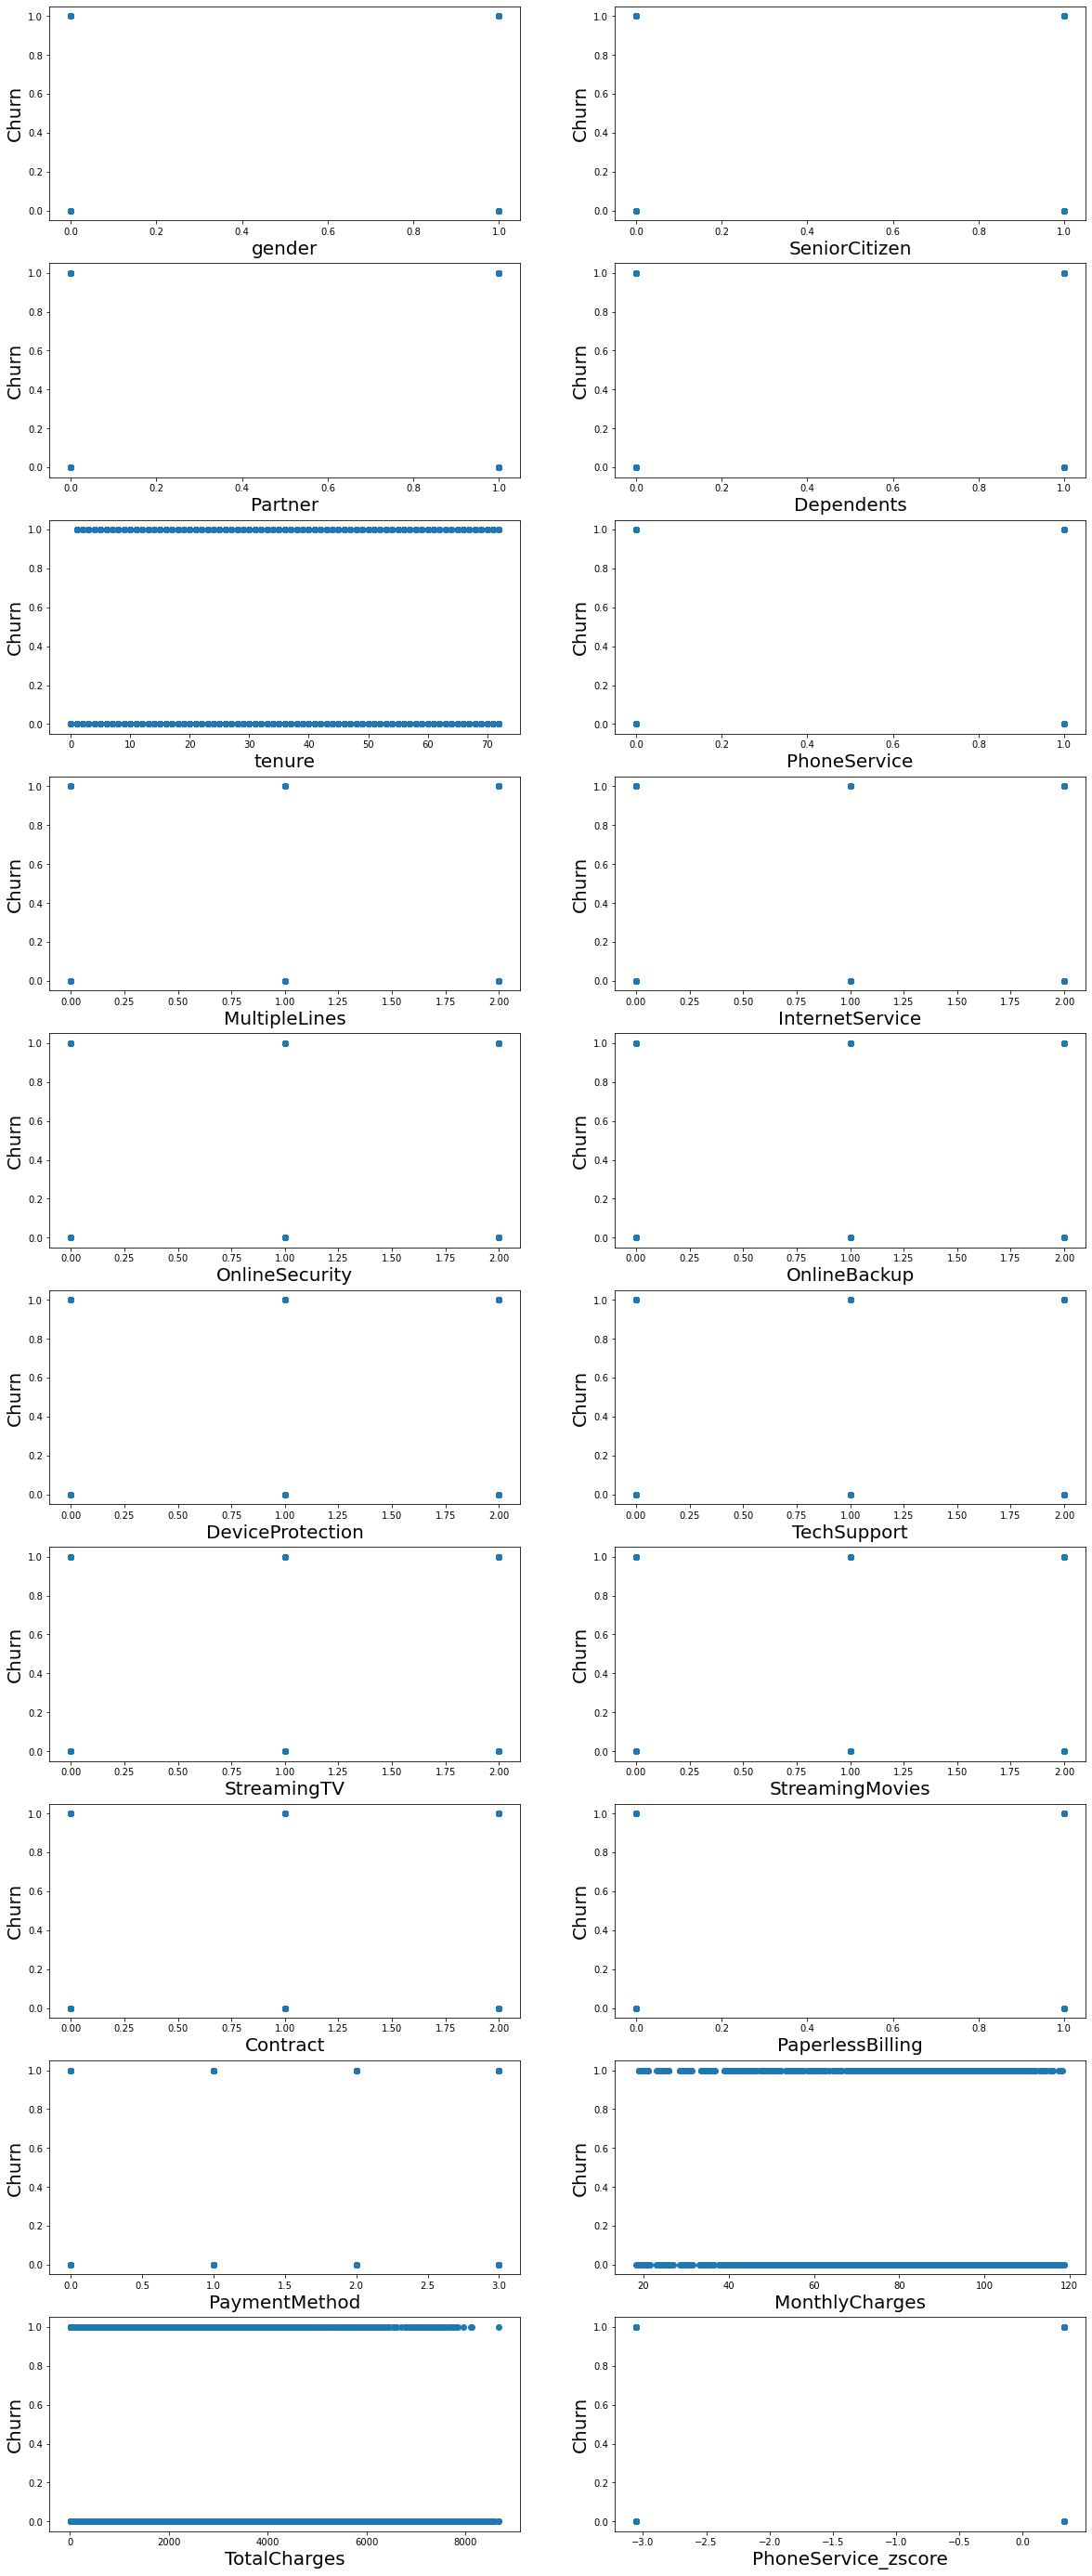

In [28]:
plt.figure(figsize = (20,50), facecolor = 'white')
plotnumber = 1

for column in x:
    if plotnumber<=20:
        ax = plt.subplot(10,2,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Churn', fontsize = 20)
    plotnumber+=1
plt.show()

The relationship looks fairly linear between each variable with the target
## Standardisation

In [29]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
x = mms.fit_transform(x)

Thus the data is standardised
## Finding best random state

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [31]:
maxacc = 0
maxrs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    acc = LR.score(x_test,y_test)
    if acc>maxacc:
        maxacc = acc
        maxrs = i
print('Best accuracy is:',maxacc,'on Random State',maxrs)

Best accuracy is: 0.8282469836763662 on Random State 139


In [32]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20, random_state = 139)

## Balance the imbalanced dataset

In [33]:
from imblearn.over_sampling import SMOTE
from collections import Counter

Since the churn values are imbalanced, treat it using SMOTE

In [34]:
print ('Before fit {}'.format (Counter(y_train)))
ove_sam = SMOTE (0.75)
x_train,y_train = ove_sam.fit_resample(x_train,y_train)
print ('After fit {}'.format (Counter(y_train)))

Before fit Counter({0.0: 4124, 1.0: 1510})
After fit Counter({0.0: 4124, 1.0: 3093})


## Logistic Regression

In [35]:
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print('Accuracy', accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 78.56635911994321
[[850 200]
 [102 257]]
              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85      1050
         1.0       0.56      0.72      0.63       359

    accuracy                           0.79      1409
   macro avg       0.73      0.76      0.74      1409
weighted avg       0.81      0.79      0.79      1409



## Decision tree classifier

In [36]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy', accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 72.53371185237756
[[829 221]
 [166 193]]
              precision    recall  f1-score   support

         0.0       0.83      0.79      0.81      1050
         1.0       0.47      0.54      0.50       359

    accuracy                           0.73      1409
   macro avg       0.65      0.66      0.66      1409
weighted avg       0.74      0.73      0.73      1409



## Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print('Accuracy', accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 80.48261178140525
[[916 134]
 [141 218]]
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87      1050
         1.0       0.62      0.61      0.61       359

    accuracy                           0.80      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.80      0.80      1409



## SVC

In [38]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
predsvc = svc.predict(x_test)
print('Accuracy', accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 78.56635911994321
[[863 187]
 [115 244]]
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85      1050
         1.0       0.57      0.68      0.62       359

    accuracy                           0.79      1409
   macro avg       0.72      0.75      0.73      1409
weighted avg       0.80      0.79      0.79      1409



- On comparing all the accuracy scores, Random Forest Classifier has the best accuracy scoreof 0.80. Cross check with cross validation score. 

## Cross-Validation

In [39]:
from sklearn.model_selection import cross_val_score

sc = cross_val_score(LR,x,y,cv=10)
print('LR cvs:',sc.mean())

sc1 = cross_val_score(dt,x,y,cv=10)
print('DT cvs:',sc1.mean())

sc2 = cross_val_score(rf,x,y,cv=10)
print('RFC cvs:',sc2.mean())

sc3 = cross_val_score(svc,x,y,cv=10)
print('SVC cvs:',sc3.mean())

LR cvs: 0.8030679803352676
DT cvs: 0.73193806415216
RFC cvs: 0.7921337040618956
SVC cvs: 0.7986661831076726


- The cross validation score for Logistic regression is 0.80
    - Accuracy is 0.79
- The cross validation score for Decision tree classifier is 0.73
    - Accuracy is 0.73
- The cross validation score for Random forest classifier is 0.79
    - Accuracy is 0.80
- The cross validation score for SVC is 0.79
    - Accuracy is 0.79

Based on CV score and accuracy score, Decision tree classifier has the same scores.

## Hyper parameter tuning

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
parameters = {'max_features':['auto','sqrt','log2'],
             'max_depth':[4,5,6,7,8],
             'criterion':['gini','entropy'],
             'random_state' : [139]
         }

GVC = GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring='accuracy')
GVC.fit(x_train,y_train)
GVC.best_params_

{'criterion': 'entropy',
 'max_depth': 8,
 'max_features': 'auto',
 'random_state': 139}

In [42]:
GVC_pred=GVC.best_estimator_.predict(x_test)
accuracy_score(y_test,GVC_pred)

0.8076650106458482

On tuning the parameters, the score is 0.80. So, use the Logistic regression model to evaluate.

## ROC AUC Score

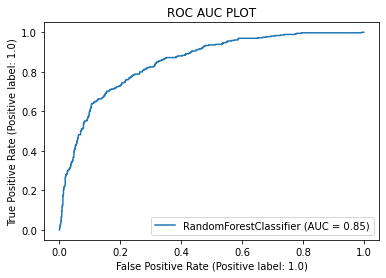

In [43]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GVC.best_estimator_,x_test,y_test)
plt.title('ROC AUC PLOT')
plt.show()

Thus the graph is drawn
## Save the model

In [45]:
import joblib
joblib.dump(GVC.best_estimator_,'Customer_churn_analysis.pkl')

['Customer_churn_analysis.pkl']

Thus the model is saved